In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Use seaborn to get the iris data by using: iris = sns.load_dataset('iris') 

In [4]:
iris = sns.load_dataset('iris')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Create a pairplot of the data set. Which flower species seems to be the most separable?

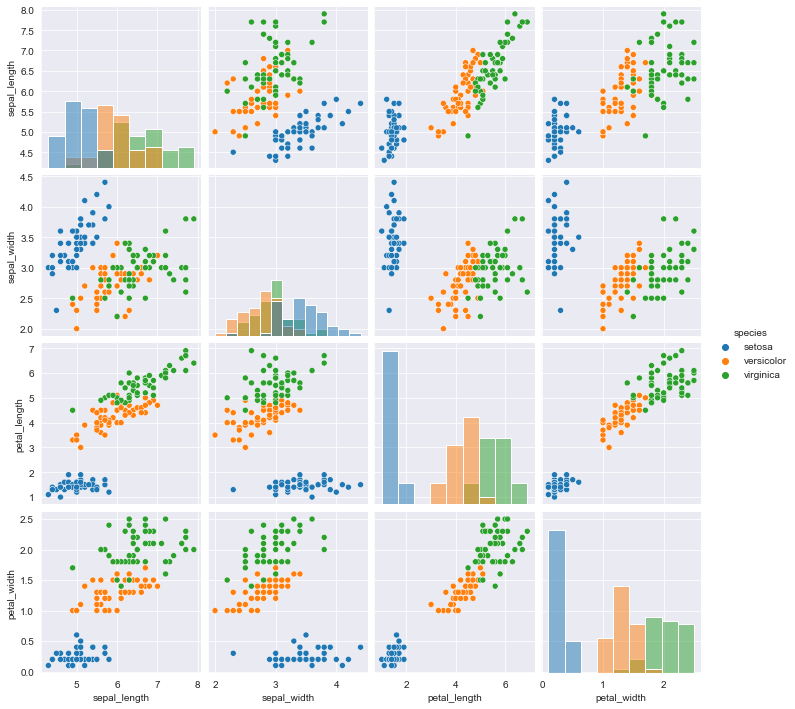

In [15]:
sns.set_style('darkgrid')
sns.pairplot(iris,hue='species',diag_kind='hist')

Create a kde plot of sepal_length versus sepal width for setosa species of flower.

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

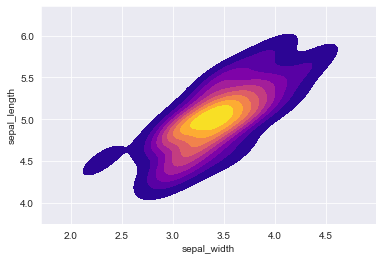

In [38]:
setosa = iris[iris['species'] == 'setosa']
sns.kdeplot(x='sepal_width', y='sepal_length',
            data=setosa, fill=True, cmap="plasma", shade=True)

 Split your data into a training set and a testing set.

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X = iris.drop('species',axis=1)
y = iris['species']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

Train a Support Vector Machine Classifier

In [45]:
from sklearn.svm import SVC

In [46]:
model = SVC()

In [47]:
model.fit(X_train, y_train)

SVC()

In [48]:
prediction = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(confusion_matrix(y_test,prediction))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [51]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Import GridsearchCV from SciKit Learn

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'C': [0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [58]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [59]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 3/5] END ................C=1000, gamma=0.01;, score=0.857 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.905 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.952 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=1.000 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.905 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.905 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.952 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 2/5] END ..............C=1000, gamma=0.0001;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=1000, gamma=0.0001;, score=0.905 total time=   0.0s
[CV 4/5] END ..............C=1000, gamma=0.0001;, score=0.905 total time=   0.0s
[CV 5/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [61]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [62]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [63]:
grid_prediction = grid.predict(X_test)

In [64]:
print(confusion_matrix(y_test,grid_prediction))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [65]:
print(classification_report(y_test,grid_prediction ))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

